# Ising Model

The Ising model is a mathematical model used in statistical mechanics to study phase transitions in physical systems, particularly in magnetism. It was proposed by the physicist Ernst Ising in 1925 to describe the behavior of magnetic spins in a lattice.

In the Ising model, each lattice site can be in one of two states, typically represented as "up" or "down" spins. The interactions between neighboring spins are taken into account, described by an energy function that depends on the alignment of neighboring spins. When spins are aligned, the energy is lowered, while misaligned spins increase the energy.

The energy function (hamiltonian) is given by,

$$H = - J \sum\limits_{\langle i, j \rangle} s_i s_j - h \sum\limits_i s_i$$

where,

$J$ represents a constant specifying the strength of interaction,

$h$ represents the magnitude of the external magnetic feild applied,

$s_i$ represents the spin of the $i^{th}$ lattice point

In [1]:
import numpy as np
from itertools import product
from matplotlib import pyplot as plt
import scienceplots

# Default configuaration for matplotlib
plt.style.use(["science", "ieee", "grid"])
plt.rcParams["figure.figsize"] = (10, 5)

# Configuaration for numpy prints
np.set_printoptions(formatter={"int": "{:+}".format})

## Lattice configuarations

1D Lattice structure with 4 lattice points: 
$$\boxed{s_0}\boxed{s_1}\boxed{s_2}\boxed{s_3}$$
where, $s_i \in \{+, -\}$

In [2]:
possible_spins = [+1, -1]
lattice_points = 4  # Number of lattice points

T = 0.1

configuarations = np.array(list(product(possible_spins, repeat=lattice_points)))

for i in range(len(configuarations)):
    print(configuarations[i])

[+1 +1 +1 +1]
[+1 +1 +1 -1]
[+1 +1 -1 +1]
[+1 +1 -1 -1]
[+1 -1 +1 +1]
[+1 -1 +1 -1]
[+1 -1 -1 +1]
[+1 -1 -1 -1]
[-1 +1 +1 +1]
[-1 +1 +1 -1]
[-1 +1 -1 +1]
[-1 +1 -1 -1]
[-1 -1 +1 +1]
[-1 -1 +1 -1]
[-1 -1 -1 +1]
[-1 -1 -1 -1]


## Energy values for each lattice configuaration

$$E_r = \frac{1}{N} \left[- J \sum\limits_{\langle i, j \rangle} s_i s_j - h \sum\limits_i s_i \right]$$

For our numerical computation,
$J = 1$ and $h = 0.1$

In [3]:
def absolute_energy(configuarations, J, h):
    H = np.zeros(len(configuarations))

    for i in range(len(configuarations)):
        for j in range(len(configuarations[i])):
            H[i] -= (
                J * configuarations[i][j - 1] * configuarations[i][j]
                + h * configuarations[i][j]
            )

    return H / len(configuarations)


J = 1
h = 0.1

energy = absolute_energy(configuarations, J, h)

for i in range(len(configuarations)):
    print(f"{configuarations[i]} \t {energy[i]:+.3f}")

[+1 +1 +1 +1] 	 -0.275
[+1 +1 +1 -1] 	 -0.013
[+1 +1 -1 +1] 	 -0.013
[+1 +1 -1 -1] 	 +0.000
[+1 -1 +1 +1] 	 -0.013
[+1 -1 +1 -1] 	 +0.250
[+1 -1 -1 +1] 	 +0.000
[+1 -1 -1 -1] 	 +0.013
[-1 +1 +1 +1] 	 -0.013
[-1 +1 +1 -1] 	 +0.000
[-1 +1 -1 +1] 	 +0.250
[-1 +1 -1 -1] 	 +0.013
[-1 -1 +1 +1] 	 +0.000
[-1 -1 +1 -1] 	 +0.013
[-1 -1 -1 +1] 	 +0.013
[-1 -1 -1 -1] 	 -0.225


## Partition function

$$\mathcal{Z} = \sum\limits_r \exp(- \beta E_r)$$

where, $\beta = \frac{1}{k_B T}, k_B = 1$

In [4]:
# Boltzman constant
k = 1


def partition_function(configuarations, T):
    energy = absolute_energy(configuarations, J, h)

    Z = 0
    for i in range(len(configuarations)):
        Z += np.exp(-energy[i] / (k * T))

    return Z


print("Partition Function:", partition_function(configuarations, T))

Partition Function: 37.35711914040018


## Probabilities for each lattice configuaration

$$P_r = \frac{\exp(- \beta E_r)}{\mathcal{Z}}$$

In [5]:
def configuaration_probabilities(configuarations, T):
    energy = absolute_energy(configuarations, J, h)
    Z = partition_function(configuarations, T)

    probabilities = np.empty(len(configuarations))
    for i in range(len(configuarations)):
        probabilities[i] = np.exp(-energy[i] / (k * T)) / Z

    return probabilities


probabilities = configuaration_probabilities(configuarations, T)

for i in range(len(configuarations)):
    print(f"{configuarations[i]} \t {probabilities[i]:+.3f}")

[+1 +1 +1 +1] 	 +0.419
[+1 +1 +1 -1] 	 +0.030
[+1 +1 -1 +1] 	 +0.030
[+1 +1 -1 -1] 	 +0.027
[+1 -1 +1 +1] 	 +0.030
[+1 -1 +1 -1] 	 +0.002
[+1 -1 -1 +1] 	 +0.027
[+1 -1 -1 -1] 	 +0.024
[-1 +1 +1 +1] 	 +0.030
[-1 +1 +1 -1] 	 +0.027
[-1 +1 -1 +1] 	 +0.002
[-1 +1 -1 -1] 	 +0.024
[-1 -1 +1 +1] 	 +0.027
[-1 -1 +1 -1] 	 +0.024
[-1 -1 -1 +1] 	 +0.024
[-1 -1 -1 -1] 	 +0.254


## Average Energy

$$\langle E \rangle = \sum\limits_r E_r P_r$$

In [6]:
def average_energy(configuarations, T):
    energy = absolute_energy(configuarations, J, h)
    probabilities = configuaration_probabilities(configuarations, T)

    E = 0
    for i in range(len(configuarations)):
        E += energy[i] * probabilities[i]

    return E


print("Average Energy:", average_energy(configuarations, T))

Average Energy: -0.1715323493083448


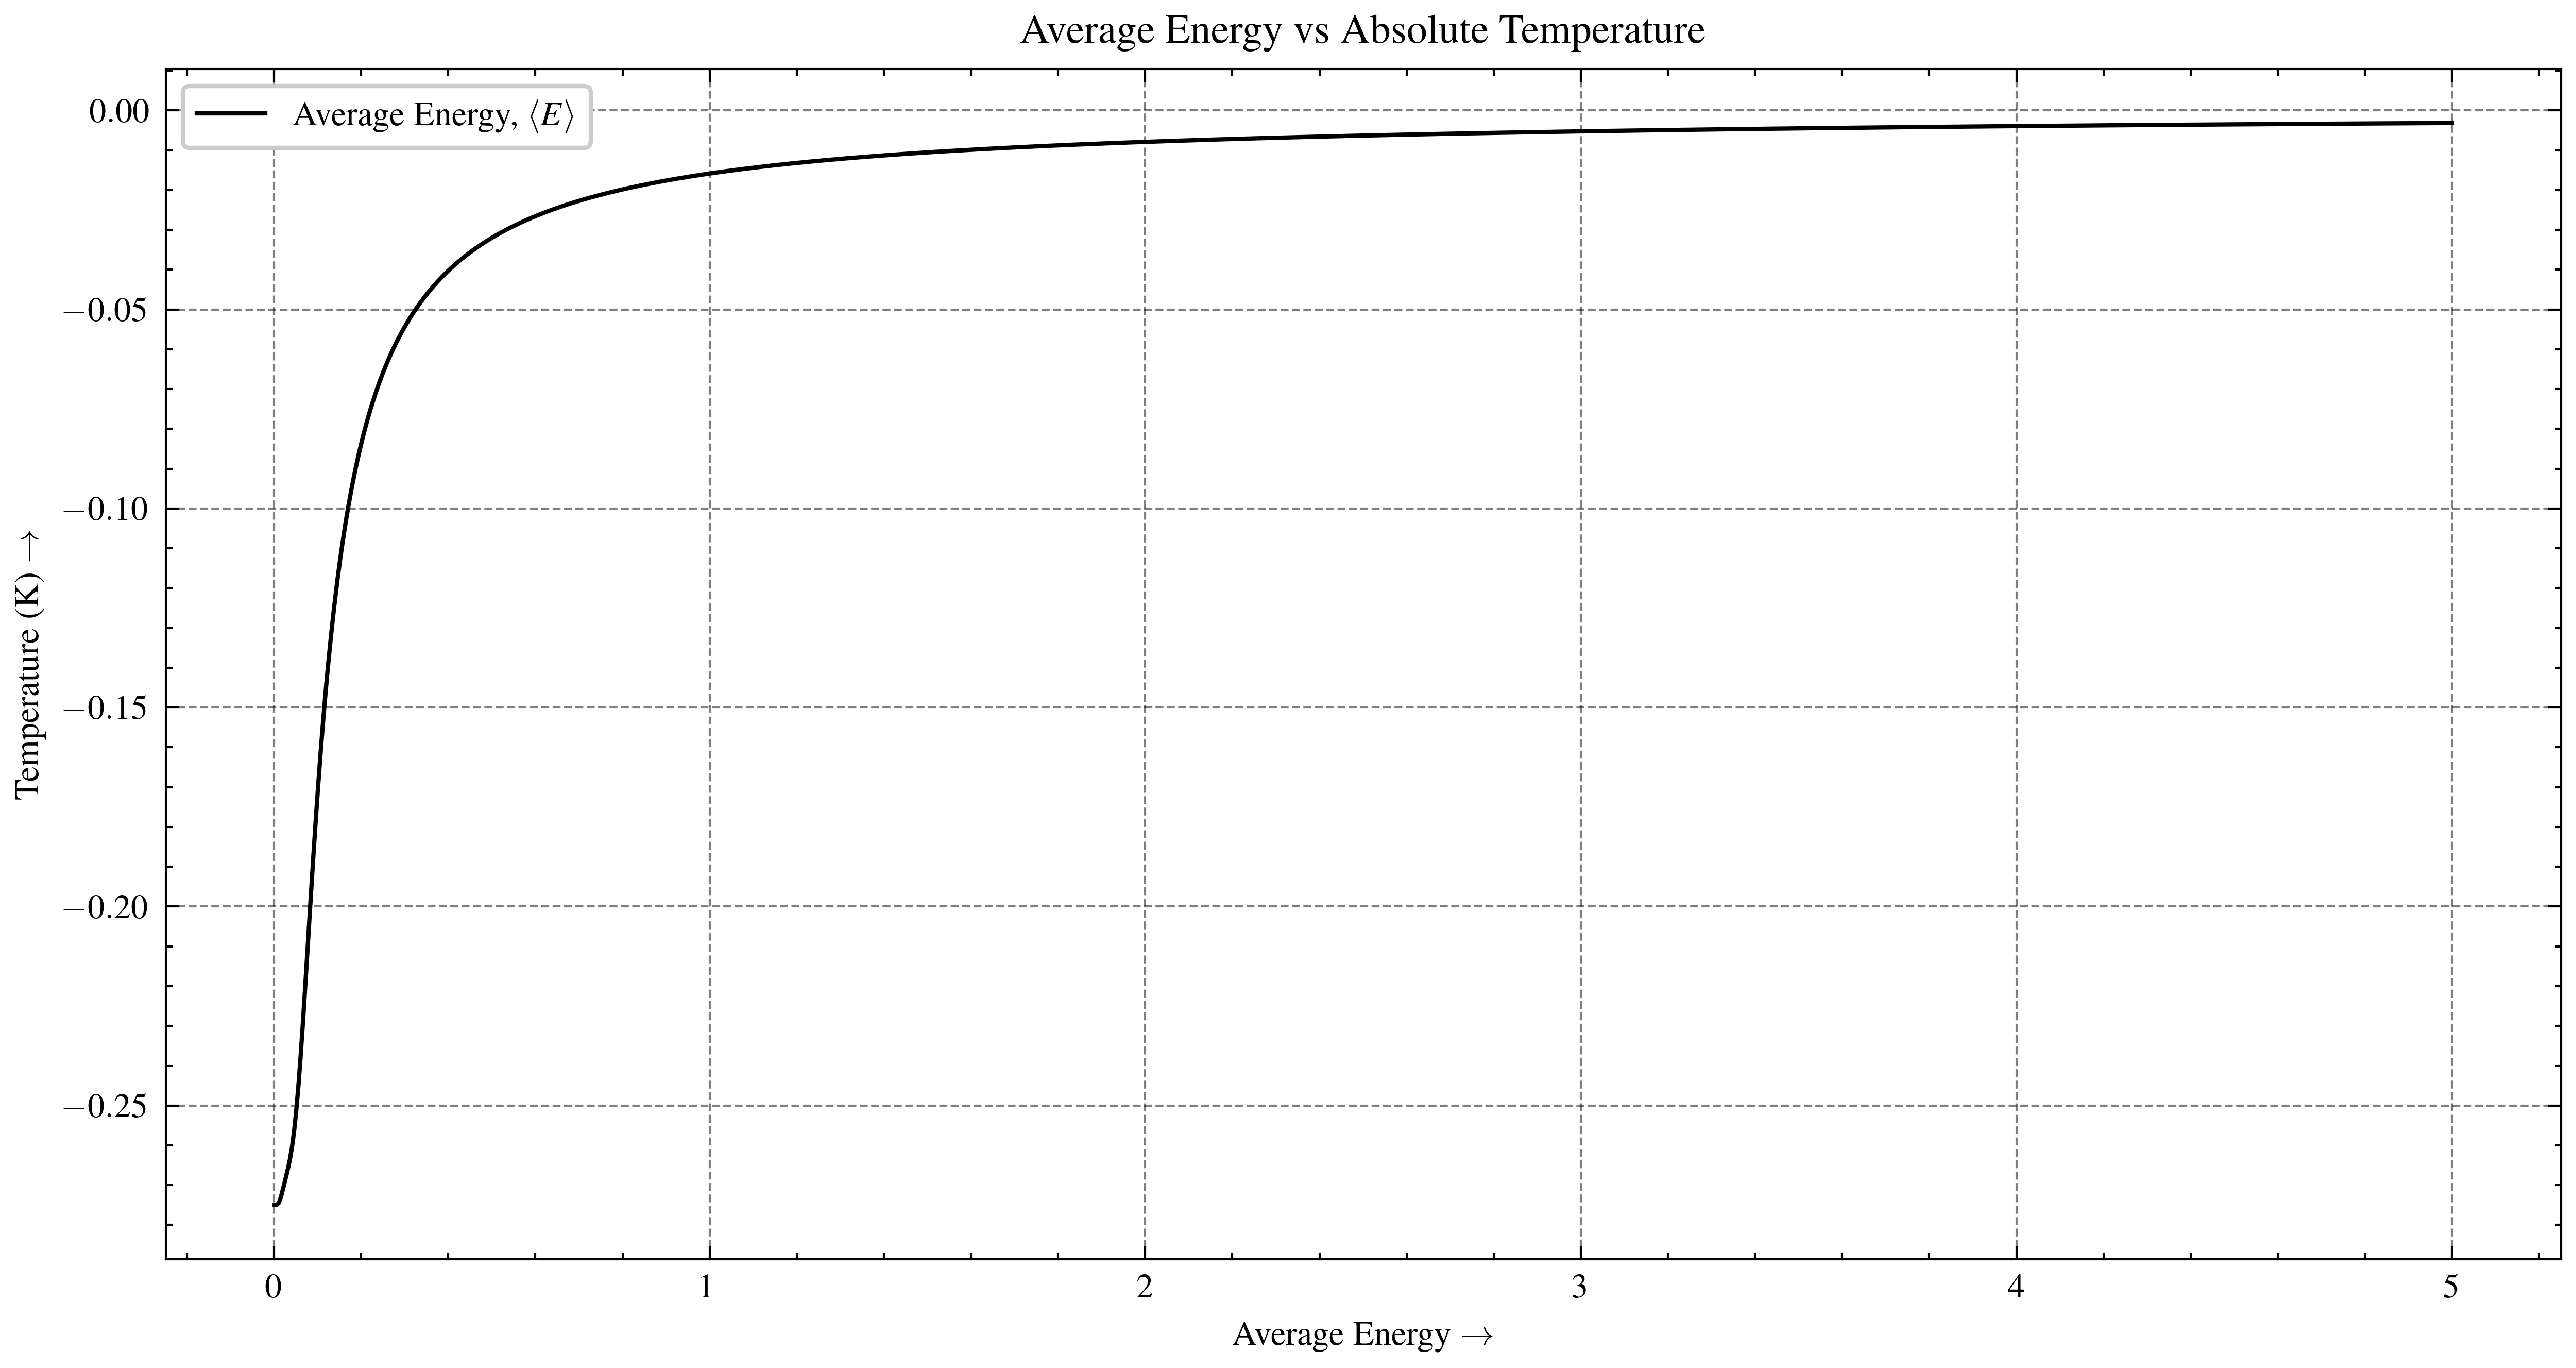

In [7]:
T_i = 1e-3
T_f = 5
n = 1000

TT = np.linspace(T_i, T_f, n)

EE = np.empty(len(TT))

for i in range(len(TT)):
    EE[i] = average_energy(configuarations, TT[i])

plt.plot(TT, EE, label="Average Energy, $\\langle E \\rangle$")
plt.title("Average Energy vs Absolute Temperature")
plt.xlabel("Average Energy $\\rightarrow$")
plt.ylabel("Temperature (K) $\\rightarrow$")
plt.legend()
plt.show()

## Magnetisation values for each lattice configuaration

$$M_r = \frac{1}{N}\sum\limits_i s_i$$

In [8]:
def absolute_magnetisation(configuarations):
    M = np.empty(len(configuarations))

    for i in range(len(configuarations)):
        M[i] = np.sum(configuarations[i])

    return M / len(configuarations)


M = absolute_magnetisation(configuarations)

for i in range(len(configuarations)):
    print(f"{configuarations[i]} \t {M[i]:+.3f}")

[+1 +1 +1 +1] 	 +0.250
[+1 +1 +1 -1] 	 +0.125
[+1 +1 -1 +1] 	 +0.125
[+1 +1 -1 -1] 	 +0.000
[+1 -1 +1 +1] 	 +0.125
[+1 -1 +1 -1] 	 +0.000
[+1 -1 -1 +1] 	 +0.000
[+1 -1 -1 -1] 	 -0.125
[-1 +1 +1 +1] 	 +0.125
[-1 +1 +1 -1] 	 +0.000
[-1 +1 -1 +1] 	 +0.000
[-1 +1 -1 -1] 	 -0.125
[-1 -1 +1 +1] 	 +0.000
[-1 -1 +1 -1] 	 -0.125
[-1 -1 -1 +1] 	 -0.125
[-1 -1 -1 -1] 	 -0.250


## Average Magnetisation

$$\langle M \rangle = \sum\limits_r M_r P_r$$

In [9]:
def average_magnetisation(configuarations, T):
    magnetisation = absolute_magnetisation(configuarations)
    probabilities = configuaration_probabilities(configuarations, T)

    M = 0
    for i in range(len(configuarations)):
        M += magnetisation[i] * probabilities[i]

    return M


print("Average Magnetisation:", average_magnetisation(configuarations, T))

Average Magnetisation: 0.04454438204788995


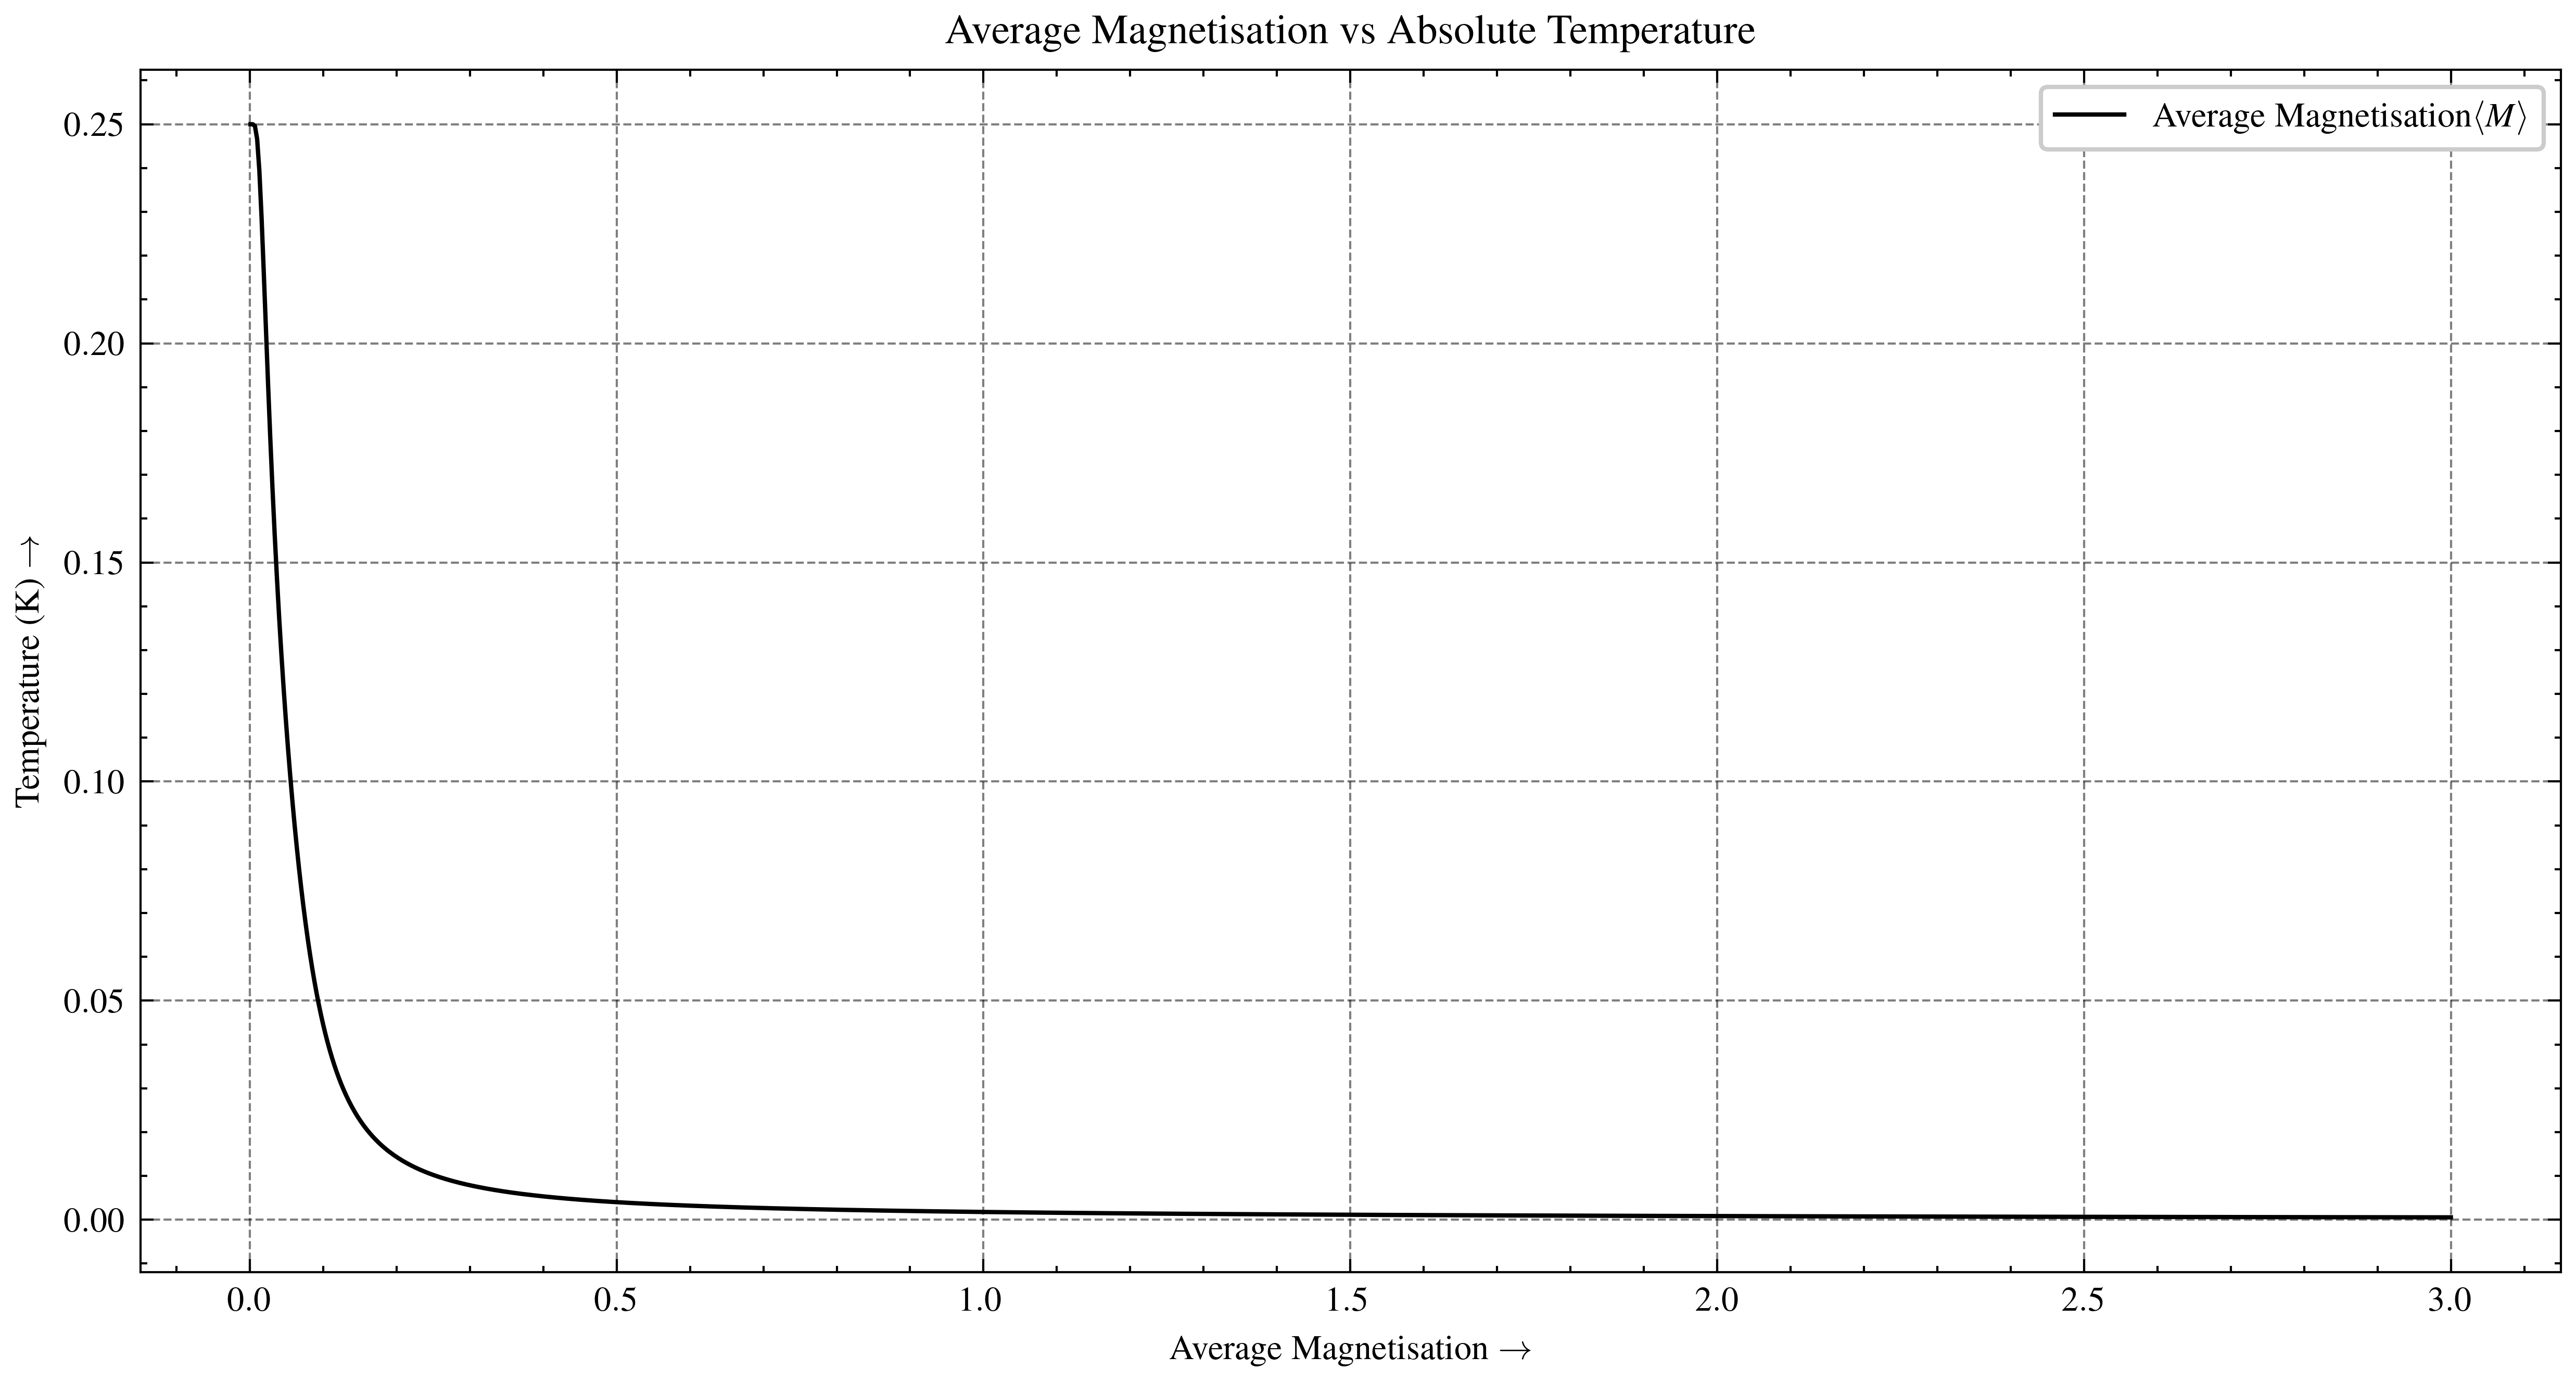

In [10]:
T_i = 1e-3
T_f = 3
n = 1000

TT = np.linspace(T_i, T_f, n)

MM = np.empty(len(TT))

for i in range(len(TT)):
    MM[i] = average_magnetisation(configuarations, TT[i])

plt.plot(TT, MM, label="Average Magnetisation$\\langle M \\rangle$")
plt.title("Average Magnetisation vs Absolute Temperature")
plt.xlabel("Average Magnetisation $\\rightarrow$")
plt.ylabel("Temperature (K) $\\rightarrow$")
plt.legend()
plt.show()